In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Problem 1: K-means

In [24]:
class k_means:
    
    def __init__(self):
        # generate random sample
        self.generate_random_sample()
    
    def generate_random_sample(self):
        # given information including weight, mean, cov of three gaussian
        weights = np.array([0.2, 0.5, 0.3])
        mu_1 = np.array([0, 0])
        mu_2 = np.array([3, 0])
        mu_3 = np.array([0, 3])
        cov = np.array([[1, 0], [0, 1]])
        
        # generate samples from 3 guassian models
        pop1 = np.random.multivariate_normal(mu_1, cov, 500)
        pop2 = np.random.multivariate_normal(mu_2, cov, 500)
        pop3 = np.random.multivariate_normal(mu_3, cov, 500)
        
        # generate random selection with given weights
        permutation = np.random.choice(np.arange(3), size = 500, p = weights)
        self.df = np.vstack([pop1[permutation == 0],
                             pop2[permutation == 1],
                             pop3[permutation == 2]])
        # actual labels
        self.y = np.sort(permutation)
        
        # print out
        print('Total number of 1 population: ' + 
              str((permutation==0).sum()))
        print('Total number of 2 population: ' + 
              str((permutation==1).sum()))
        print('Total number of 3 population: ' + 
              str((permutation==2).sum()))
    
    def initiate_k_mean(self, k):
        # set up k and initial mean point
        self.k = k
        
        # initial prediction labels
        self.pred = np.array([-1]*500)
        
        # randomly pick up k points from data as initial mean
        idx = np.random.choice(np.arange(self.df.shape[0]), k)
        self.center = self.df[idx]
        
        # visualize
        #plt.figure(figsize=(8,6))
        #_ = sns.scatterplot( x = self.df[:,0], y = self.df[:,1], hue = self.y)
        #_ = plt.plot([0, 3, 0],[0, 0, 3], 'bo', 
        #             markersize = 10, label = 'Gaussian mean')
        #_ = plt.plot( self.center[:,0], self.center[:,1], 'r^', 
        #             markersize = 10, label = 'Initial guess K')
        #_ = plt.title('Initial Condition')
        #_ = plt.legend(loc = 'best')
        
    def clustering(self):
        # initiate obj array
        self.obj = []
        # coordinate descent
        for i in range(20):
            self.update_index()
            self.update_mean()
        
        # visualize
        if self.k in [3, 5]:
            plt.figure(figsize=(8,6))
            _ = sns.scatterplot(x = self.df[:,0], 
                                y = self.df[:,1], 
                                hue = self.pred, 
                                legend = 'full',
                                palette="Set1")
            _ = plt.plot( self.center[:,0], self.center[:,1], 'k^', 
                     markersize = 10, label = 'K mean')
            _ = plt.legend()
            plt.title('Point label after 20 iteration')

    def update_index(self):
        # initiate distance matrix
        dist = np.ndarray(shape = (500,self.k))
        
        # calculate distance and assign label according to min distance
        for i in range(self.k):
            temp = self.df - self.center[i,:]
            dist[:,i] = np.sum(temp**2, axis = 1)
        self.obj.append(np.sum(np.min(dist, axis = 1)))
        self.pred = np.argmin(dist, axis = 1)
    
    def update_mean(self):
        # update cluster mean point based on updated labels
        for i in range(self.k):
            self.center[i,:] = np.mean(self.df[self.pred == i], axis = 0)
    

Total number of 1 population: 101
Total number of 2 population: 247
Total number of 3 population: 152


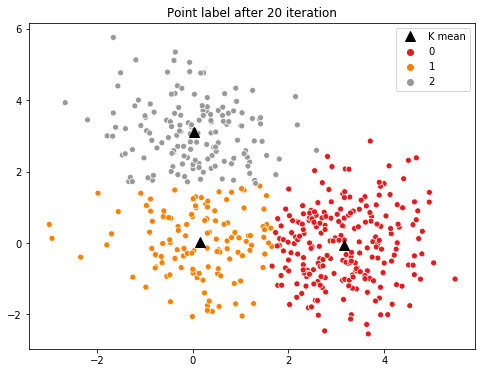

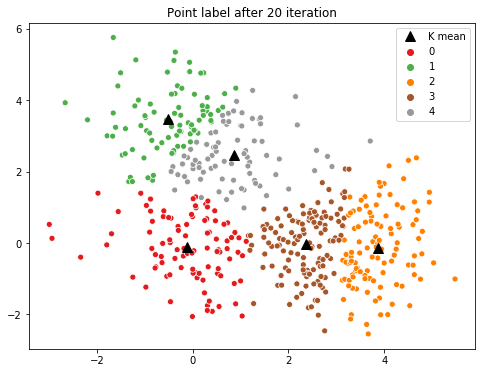

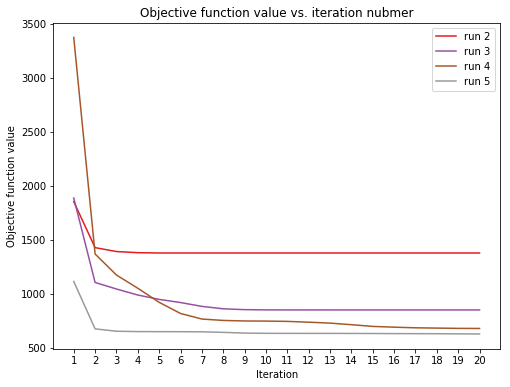

In [26]:
# initialize k_mean class object
p1 = k_means()
for k in range(2,6):
    p1.initiate_k_mean(k)
    p1.clustering()
    if k == 2:
        obj = np.hstack((np.arange(1,21).reshape(-1,1), 
                         np.array(p1.obj).reshape(-1,1) , 
                         np.ones((20,1))*k))
    else:
        _ = np.hstack((np.arange(1,21).reshape(-1,1), 
                       np.array(p1.obj).reshape(-1,1) , 
                       np.ones((20,1))*k))
        obj = np.vstack((obj, _))
# obj plot
plt.figure(figsize=(8,6))
_ = sns.lineplot(x = obj[:,0], 
                 y = obj[:,1], 
                 hue = obj[:,2].astype(int),
                 palette='Set1')
_ = plt.title('Objective function value vs. iteration nubmer')
_ = plt.xlabel('Iteration')
_ = plt.ylabel('Objective function value')
_ = plt.xticks(np.arange(1,21))
_ = plt.legend(['run 2','run 3','run 4','run 5'])